In [13]:
# Load coffee stocks data

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load coffee stocks data
stocks = pd.read_csv(r"C:\Users\marle\OneDrive\Documents\Coding\Coffee Time Series Analysis\Annual Mid-Year World Green Coffee Stocks.csv")
print(stocks.head())
print(stocks.tail())
# Rename yield column
stocks.rename(columns={'World Mid-Year Stocks (1000 60kg bags)': 'stocks'}, inplace = True)
print(stocks.head())

# Load coffee price data
# Load robusta prices
robusta_prices = pd.read_csv(r"C:\Users\marle\OneDrive\Documents\Coding\Coffee Time Series Analysis\PCOFFROBUSDM.csv")

# Load other mild prices
other_mild_prices = pd.read_csv(r"C:\Users\marle\OneDrive\Documents\Coding\Coffee Time Series Analysis\PCOFFOTMUSDM.csv")

# Start all series in 1990 and end all series in 2023
robusta_prices = robusta_prices.head(len(robusta_prices) - 9)
other_mild_prices = other_mild_prices.head(len(other_mild_prices) - 9)
stocks = stocks.tail(len(stocks) - 30)
print(robusta_prices.head())
print(robusta_prices.tail())
print(other_mild_prices.head())
print(other_mild_prices.tail())
print(stocks.head())
print(stocks.tail())

# Create annual average prices for robusta and other mild prices to assess relationship with annual population data
'Annual Average Coffee Bean Prices'
# Create time index for annual mean calculation
robusta_prices.loc[:, 'DATE'] = pd.to_datetime(robusta_prices['DATE'])
robusta_prices.set_index('DATE', inplace=True)
other_mild_prices.loc[:, 'DATE'] = pd.to_datetime(other_mild_prices['DATE'])
other_mild_prices.set_index('DATE', inplace=True)
annual_robusta = robusta_prices.resample('YE').mean()
annual_other_mild = other_mild_prices.resample('YE').mean()
print(annual_robusta.head())
print(annual_robusta.tail())
print(annual_other_mild.head())
print(annual_other_mild.tail())

# Merge series to the same dataframe
stocks.loc[:, 'Year_only'] = stocks['Year']
# Convert 'Year' to datetime and extract the year
annual_other_mild = annual_other_mild.reset_index().rename(columns={'DATE': 'Year'})
annual_robusta = annual_robusta.reset_index().rename(columns={'DATE': 'Year'})
annual_other_mild.loc[:, 'Year'] = pd.to_datetime(annual_other_mild['Year'])
annual_other_mild.loc[:, 'Year_only'] = annual_other_mild['Year'].dt.year
annual_robusta.loc[:, 'Year'] = pd.to_datetime(annual_robusta['Year'])
annual_robusta.loc[:, 'Year_only'] = annual_robusta['Year'].dt.year

combined_df = pd.merge(stocks[['Year_only', 'stocks']], annual_other_mild[['Year_only', 'PCOFFOTMUSDM']], on='Year_only', how='inner')
combined_df = pd.merge(combined_df, annual_robusta[['Year_only', 'PCOFFROBUSDM']], on='Year_only', how='inner')
print(combined_df)

# Numeric dtypes
combined_df['Year_only'] = combined_df['Year_only'].astype(int)
if combined_df['stocks'].dtype == 'object':
    combined_df['stocks'] = combined_df['stocks'].str.replace(',', '').astype(int)
else:
    combined_df['stocks'] = combined_df['stocks'].astype(int)
print(combined_df['Year_only'].dtype)
print(combined_df['stocks'].dtype)

   Year World Mid-Year Stocks (1000 60kg bags)
0  1960                                 59,542
1  1961                                 65,931
2  1962                                 74,904
3  1963                                 81,295
4  1964                                 78,018
    Year World Mid-Year Stocks (1000 60kg bags)
60  2020                                 35,808
61  2021                                 37,494
62  2022                                 31,940
63  2023                                 26,588
64  2024                                 23,933
   Year  stocks
0  1960  59,542
1  1961  65,931
2  1962  74,904
3  1963  81,295
4  1964  78,018
         DATE  PCOFFROBUSDM
0  1990-01-01     50.520000
1  1990-02-01     51.299999
2  1990-03-01     57.680000
3  1990-04-01     57.389999
4  1990-05-01     55.029999
           DATE  PCOFFROBUSDM
403  2023-08-01    124.356522
404  2023-09-01    123.891429
405  2023-10-01    118.835000
406  2023-11-01    122.775909
407  2023-12-01 

C:\Users\marle\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
C:\Users\marle\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [15]:
# Summary statistics

print(combined_df['stocks'].describe())

count       34.000000
mean     34901.205882
std       6995.602319
min      20815.000000
25%      29673.250000
50%      35535.500000
75%      40289.750000
max      47283.000000
Name: stocks, dtype: float64


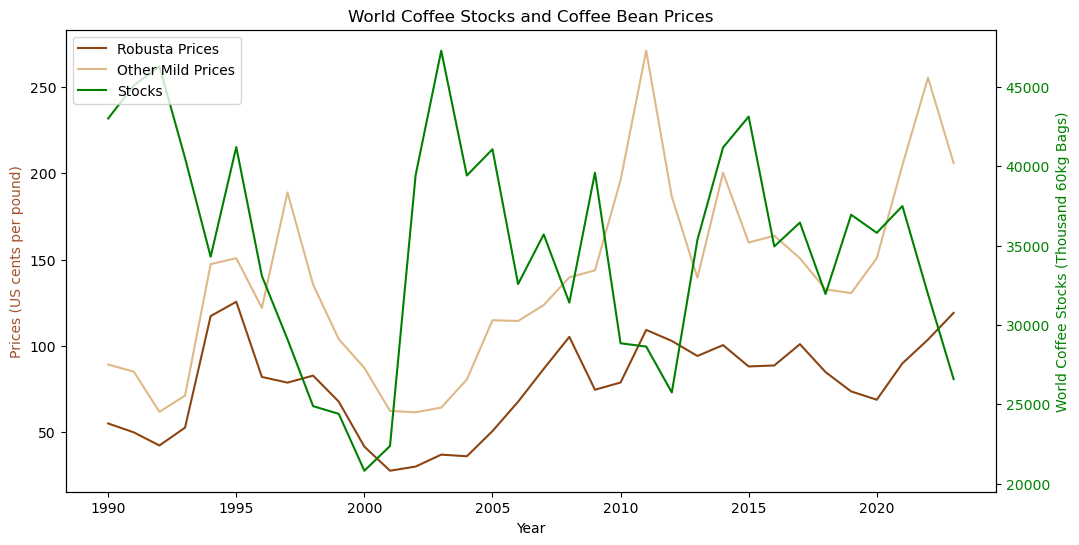

In [17]:
# Plot of coffee stocks against coffee prices

fig, ax1 = plt.subplots(figsize=(12, 6))
line1 = ax1.plot(combined_df['Year_only'], combined_df['PCOFFROBUSDM'], label='Robusta Prices', color='saddlebrown')
line2 = ax1.plot(combined_df['Year_only'], combined_df['PCOFFOTMUSDM'], label='Other Mild Prices', color='burlywood')
ax1.set_xlabel('Year')
ax1.set_ylabel('Prices (US cents per pound)', color='sienna')

# Create a second y-axis for stocks
ax2 = ax1.twinx()
line3 = ax2.plot(combined_df['Year_only'], combined_df['stocks'], label='Stocks', color='green')
ax2.set_ylabel('World Coffee Stocks (Thousand 60kg Bags)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Set the title and legends
plt.title('World Coffee Stocks and Coffee Bean Prices')

# Unified legend
lines = line1 + line2 + line3
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left')

plt.show()
fig.savefig(r'C:\Users\marle\OneDrive\Documents\Coding\Coffee Time Series Analysis\Coffee Stocks and Coffee Bean Prices.png')

In [19]:
# Pearson's Rank Correlation Coefficient
from scipy.stats import pearsonr

print('\nRobusta Correlation')
robusta_stocks_corr, robusta_stocks_p_value = pearsonr(combined_df['stocks'], combined_df['PCOFFROBUSDM'])
print(f'Production Pearson correlation coefficient: {robusta_stocks_corr} P-value: {robusta_stocks_p_value}')

print('\nOther Mild Correlation')
other_stocks_GDP_corr, other_mild_stocks_p_value = pearsonr(combined_df['stocks'], combined_df['PCOFFOTMUSDM'])
print(f'Production Pearson correlation coefficient: {other_stocks_GDP_corr} P-value: {other_mild_stocks_p_value}')

'''
The relationship between coffee prices and coffee stocks is not very statistically significant.
However, the negative correlation between stocks and prices is what we would expect to see.
Coffee stocks are likely to be sold off when the price is high.
'''


Robusta Correlation
Production Pearson correlation coefficient: -0.2084353567341234 P-value: 0.23682349824308863

Other Mild Correlation
Production Pearson correlation coefficient: -0.2964652642596628 P-value: 0.08865614600593247


'\nThe relationship between coffee prices and coffee stocks is not very statistically significant.\nHowever, the negative correlation between stocks and prices is what we would expect to see.\nCoffee stocks are likely to be sold off when the price is high.\n'


***ADF stationarity test***
ADF (constant only) test of coffee stocks data
ADF test statistic: -1.9326579617480844 P-value: 0.3168571249167015
(-1.9326579617480844, 0.3168571249167015, 9, 24, {'1%': -3.7377092158564813, '5%': -2.9922162731481485, '10%': -2.635746736111111}, 456.97460225675)

***ADF trend-stationarity test***
ADF (constant + trend only) test of coffee stocks data
ADF test statistic: -6.163065844355784 P-value: 9.914863959176256e-07
(-6.163065844355784, 9.914863959176256e-07, 8, 25, {'1%': -4.3749647199999995, '5%': -3.6034675359999997, '10%': -3.23818632}, 448.266894753909)
The ADF test suggests we should reject the null hypothesis that coffee stocks are not trend stationary.

Change in Coffee Stocks
    Year_only  stocks  PCOFFOTMUSDM  PCOFFROBUSDM  stocks_diff
0        1990   43012     89.147504     54.986667          NaN
1        1991   45096     85.027028     49.832604       2084.0
2        1992   46298     61.737390     42.223967       1202.0
3        1993   40522

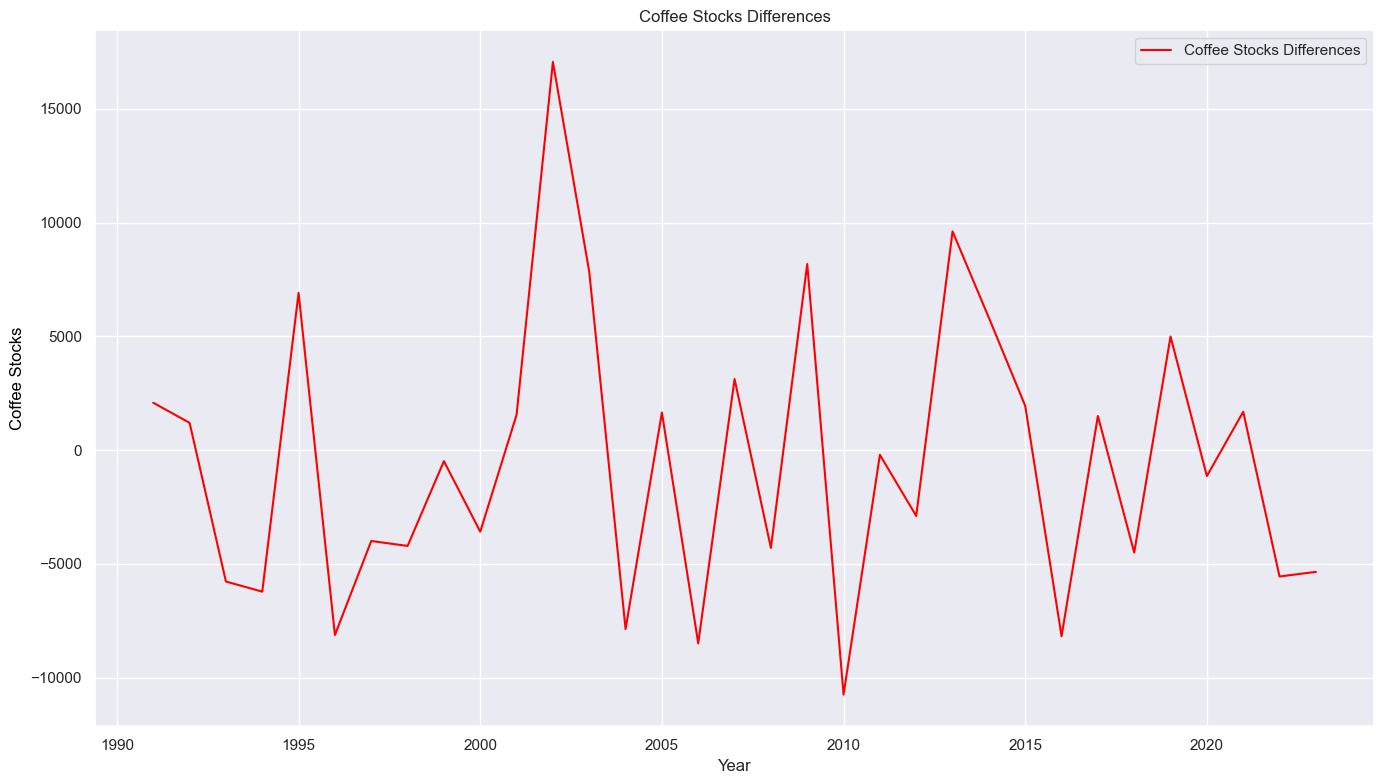

ADF test statistic: -6.315896590184406 P-value: 3.151260012893212e-08
(-6.315896590184406, 3.151260012893212e-08, 10, 22, {'1%': -3.769732625845229, '5%': -3.005425537190083, '10%': -2.6425009917355373}, 426.315443079205)

KPSS (constant only) test of coffee stocks differences
KPSS (constant-only) test statistic: 0.049653280708638864 P-value: 0.1
(0.049653280708638864, 0.1, 0, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


C:\Users\marle\AppData\Local\Temp\ipykernel_2764\2234978765.py:41: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(x = combined_df['stocks_diff'].dropna(), regression = "c")


'\nBoth detrending and differencing produce a series that passes stationarity tests.\nIntuitively, the changes in coffee stocks are more appealing as an explanatory variable for coffee prices, reflecting the drawdown and build up of coffee stocks by speculators in response to and driving price changes.\nAdditionally, it is unclear why coffee stocks might be trending downwards.\n'

In [23]:
# Stationarity Analysis
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

# ADF stationarity test
# The null hypothesis is that there is a unit root. The alternative hypothesis that there is no unit root (stationary).
print('\n***ADF stationarity test***')
print('ADF (constant only) test of coffee stocks data')
result = adfuller(combined_df['stocks'], regression = "c")
print(f'ADF test statistic: {result[0]} P-value: {result[1]}')
print(result)


# Are coffee stocks trend-stationary?
print('\n***ADF trend-stationarity test***')
print('ADF (constant + trend only) test of coffee stocks data')
result = adfuller(combined_df['stocks'], regression = "ct")
print(f'ADF test statistic: {result[0]} P-value: {result[1]}')
print(result)
print('The ADF test suggests we should reject the null hypothesis that coffee stocks are not trend stationary.')

# Is differenced population stationary?
print("\nChange in Coffee Stocks")
combined_df['stocks_diff'] = combined_df['stocks'] - combined_df['stocks'].shift()
print(combined_df)
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year_only', y='stocks_diff', data=combined_df, label='Coffee Stocks Differences', color='red')
plt.title('Coffee Stocks Differences')
plt.xlabel('Year')
plt.ylabel('Coffee Stocks', color='black')
sns.set_theme()
plt.tight_layout()
plt.savefig(r'C:\Users\marle\OneDrive\Documents\Coding\Coffee Time Series Analysis\Coffee Stocks Differences.png')
plt.show()

# Ensure the NA from differencing is removed before the ADF test
result = adfuller(combined_df['stocks_diff'].dropna(), regression = "c")
print(f'ADF test statistic: {result[0]} P-value: {result[1]}')
print(result)
print('\nKPSS (constant only) test of coffee stocks differences')
result = kpss(x = combined_df['stocks_diff'].dropna(), regression = "c")
print(f'KPSS (constant-only) test statistic: {result[0]} P-value: {result[1]}')
print(result)

'''
According to the ADF test, we should reject the null hypothesis in favour of the alternative hypothesis that differenced stocks is a stationary series at the 5% significance level.
According to the KPSS test, we cannot reject the null hypothesis that differenced stocks is a stationary time series.
So we should treat differenced stocks as stationary.
'''

'''
Both detrending and differencing produce a series that passes stationarity tests.
Intuitively, the changes in coffee stocks are more appealing as an explanatory variable for coffee prices, reflecting the drawdown and build up of coffee stocks by speculators in response to and driving price changes.
Additionally, it is unclear why coffee stocks might be trending downwards.
'''